# Number of hospitalized patients by reporting date
# Aantal in het ziekenhuis opgenomen patiënten
# Dataset 2 from rivm.nl/coronavirus-covid-19/grafieken

In [7]:
#Importing relevant library 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns 
import datetime

In [8]:
# Scrapping the 4 csv data from rivm.nl
request_data=requests.get('https://www.rivm.nl/coronavirus-covid-19/grafieken').text
soup = BeautifulSoup(request_data,'html.parser')
#print(soup.prettify())
my_table=soup.find_all('script', {'type':"application/json"})
my_table=str(my_table)
my_table=my_table.split("csv")

In [9]:
#Data cleaning process 
table_2 = my_table[3]
table_2 = table_2.replace('\\u0022', '')
table_2 = table_2.split("data:")[0]
table_2 = table_2.split(']","pre')[0]
table_2 = table_2.split("ren],")[1]
table_2 = table_2.replace("]", '')
table_2 = table_2.split("[")

In [10]:
#Setting the data frame 
df2 = pd.DataFrame([sub.split(",") for sub in table_2 ])
df2.drop([3], axis=1, inplace=True)
df2.drop(0,inplace=True)
df2.columns=["day_month","Hospitalized_New_Cases","Hospitalized_Previous_Cases"]

In [11]:
#Changing the numerical columns from string to integer and adding a total column 
df2.Hospitalized_New_Cases = pd.to_numeric(df2.Hospitalized_New_Cases, downcast='integer')
df2.Hospitalized_Previous_Cases = pd.to_numeric(df2.Hospitalized_Previous_Cases, downcast='integer')
df2.loc[:,"Hospitalized_Total_Cases"] = df2.Hospitalized_New_Cases + df2.Hospitalized_Previous_Cases

In [12]:
#Setting the date data to date form for pandas library
df2['Year']= '2020'
df2['date']=df2.day_month+' '+ df2.Year
df2.date=df2.date.str.replace("mrt","mar")
df2.date=df2.date.str.replace("mei","may")
df2.date=pd.to_datetime(df2.date).dt.date
df2.drop(['day_month'], axis=1, inplace=True)
df2.drop(['Year'], axis=1, inplace=True)
df2 = df2[['date', 'Hospitalized_New_Cases', 'Hospitalized_Previous_Cases', 'Hospitalized_Total_Cases']]
#df2=df2.set_index('date')

In [13]:
df2.head()

,date,Hospitalized_New_Cases,Hospitalized_Previous_Cases,Hospitalized_Total_Cases
1,2020-05-04,0,57,57
2,2020-05-05,0,35,35
3,2020-05-06,0,53,53
4,2020-05-07,0,44,44
5,2020-05-08,0,40,40


In [14]:
df2.tail()

,date,Hospitalized_New_Cases,Hospitalized_Previous_Cases,Hospitalized_Total_Cases
68,2020-07-10,0,1,1
69,2020-07-11,0,0,0
70,2020-07-12,1,0,1
71,2020-07-13,0,0,0
72,2020-07-14,0,0,0


In [15]:
#df2.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_hospitalized.csv',  index = True, header=True)

In [16]:
df2.Hospitalized_Total_Cases.sum()

813

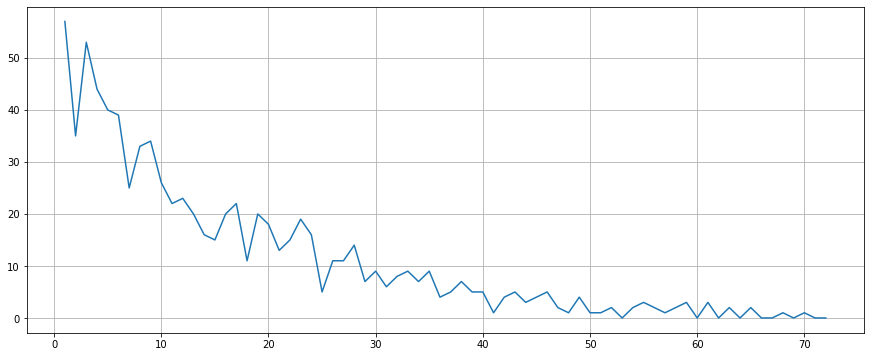

In [17]:
df2.Hospitalized_Total_Cases.plot(kind='line', x='date', y='Hospitalized_Total_Cases', grid=True, figsize=(15,6))

(array([737546., 737560., 737577., 737591., 737607., 737621.]),
 <a list of 6 Text major ticklabel objects>)

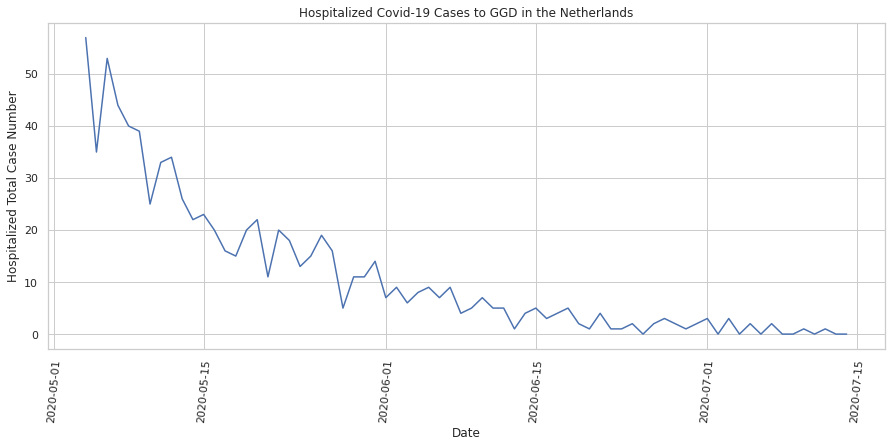

In [18]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.lineplot(y=df2.Hospitalized_Total_Cases, x=df2.date, data=df2, palette='rainbow', ci=None)
ax.set(xlabel='Date', ylabel='Hospitalized Total Case Number', title='Hospitalized Covid-19 Cases to GGD in the Netherlands')
plt.xticks(rotation=85)